In [1]:
## 정적자산배분전략(LAA)를 이용한 포트폴리오 최적화를 수행할 수 있습니다.

In [2]:
# 기본 패키지
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import json

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
## 이미지에서 한글이 나오게 하는 설정
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [3]:
## 사전 정의한 함수 모음
import graphModule as gm
import myfuncs as mf
from quant_functions import anal_funcs
import portfolio_obtimizer

In [4]:
## color 설정
with open('colors.json') as f:
    mycolors = json.load(f)

## DataLoad

In [5]:
dataset = pd.read_csv('trend_data.csv', index_col=0)
dataset.index = pd.to_datetime(dataset.index)

## EDA

In [6]:
assets = ['QQQ', 'TLT', 'IAU']

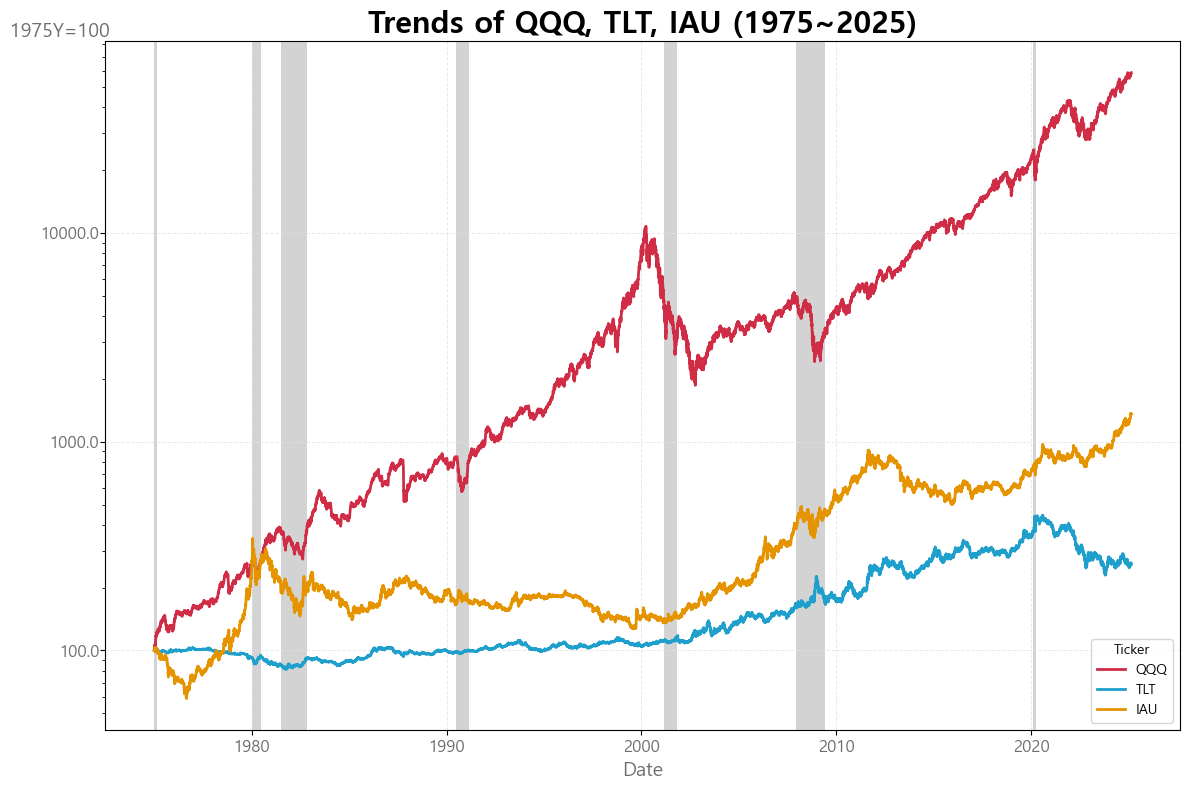

In [7]:
gm.trend_plot(dataset, assets, colors=[mycolors['color_norm'], mycolors['color_cont'], mycolors['color_sub']])

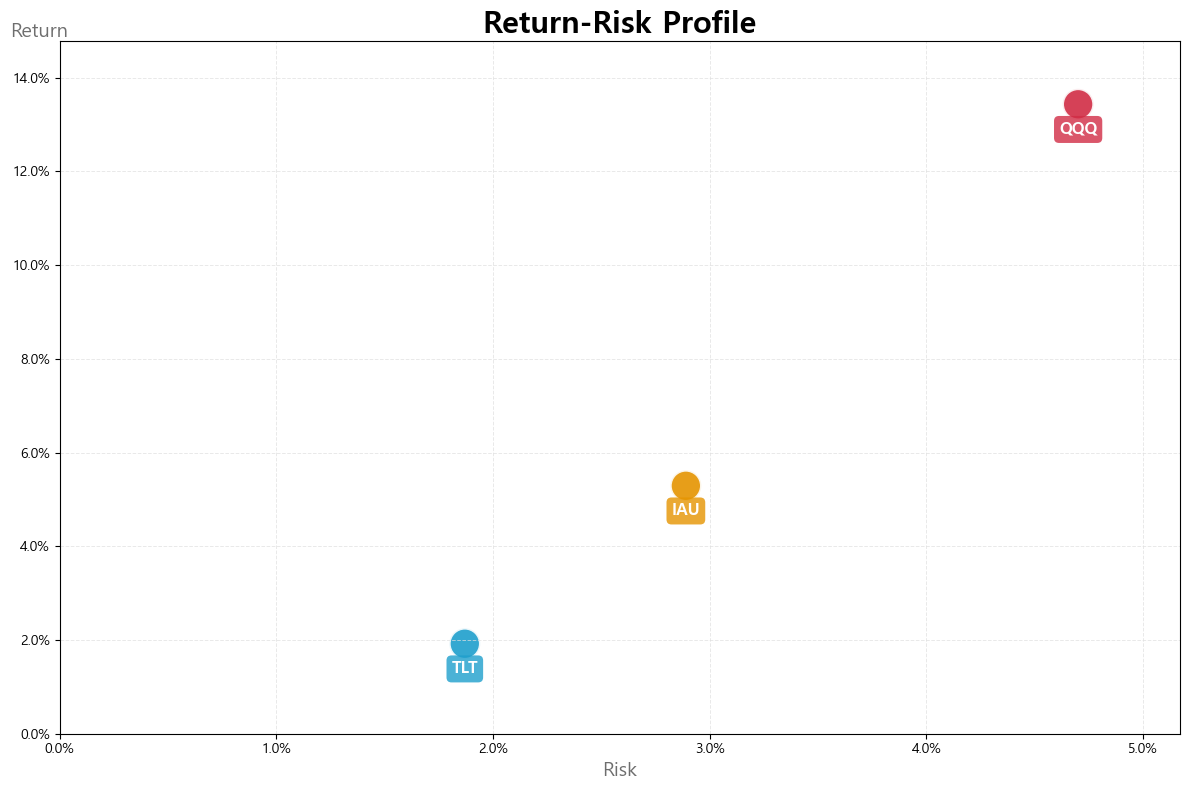

In [8]:
return_risk_df = anal_funcs.get_Vol_report(dataset[assets], method='a', rf=0)
gm.return_risk_profile_plot(return_risk_df, assets, colors=[mycolors['color_norm'], mycolors['color_cont'], mycolors['color_sub']])

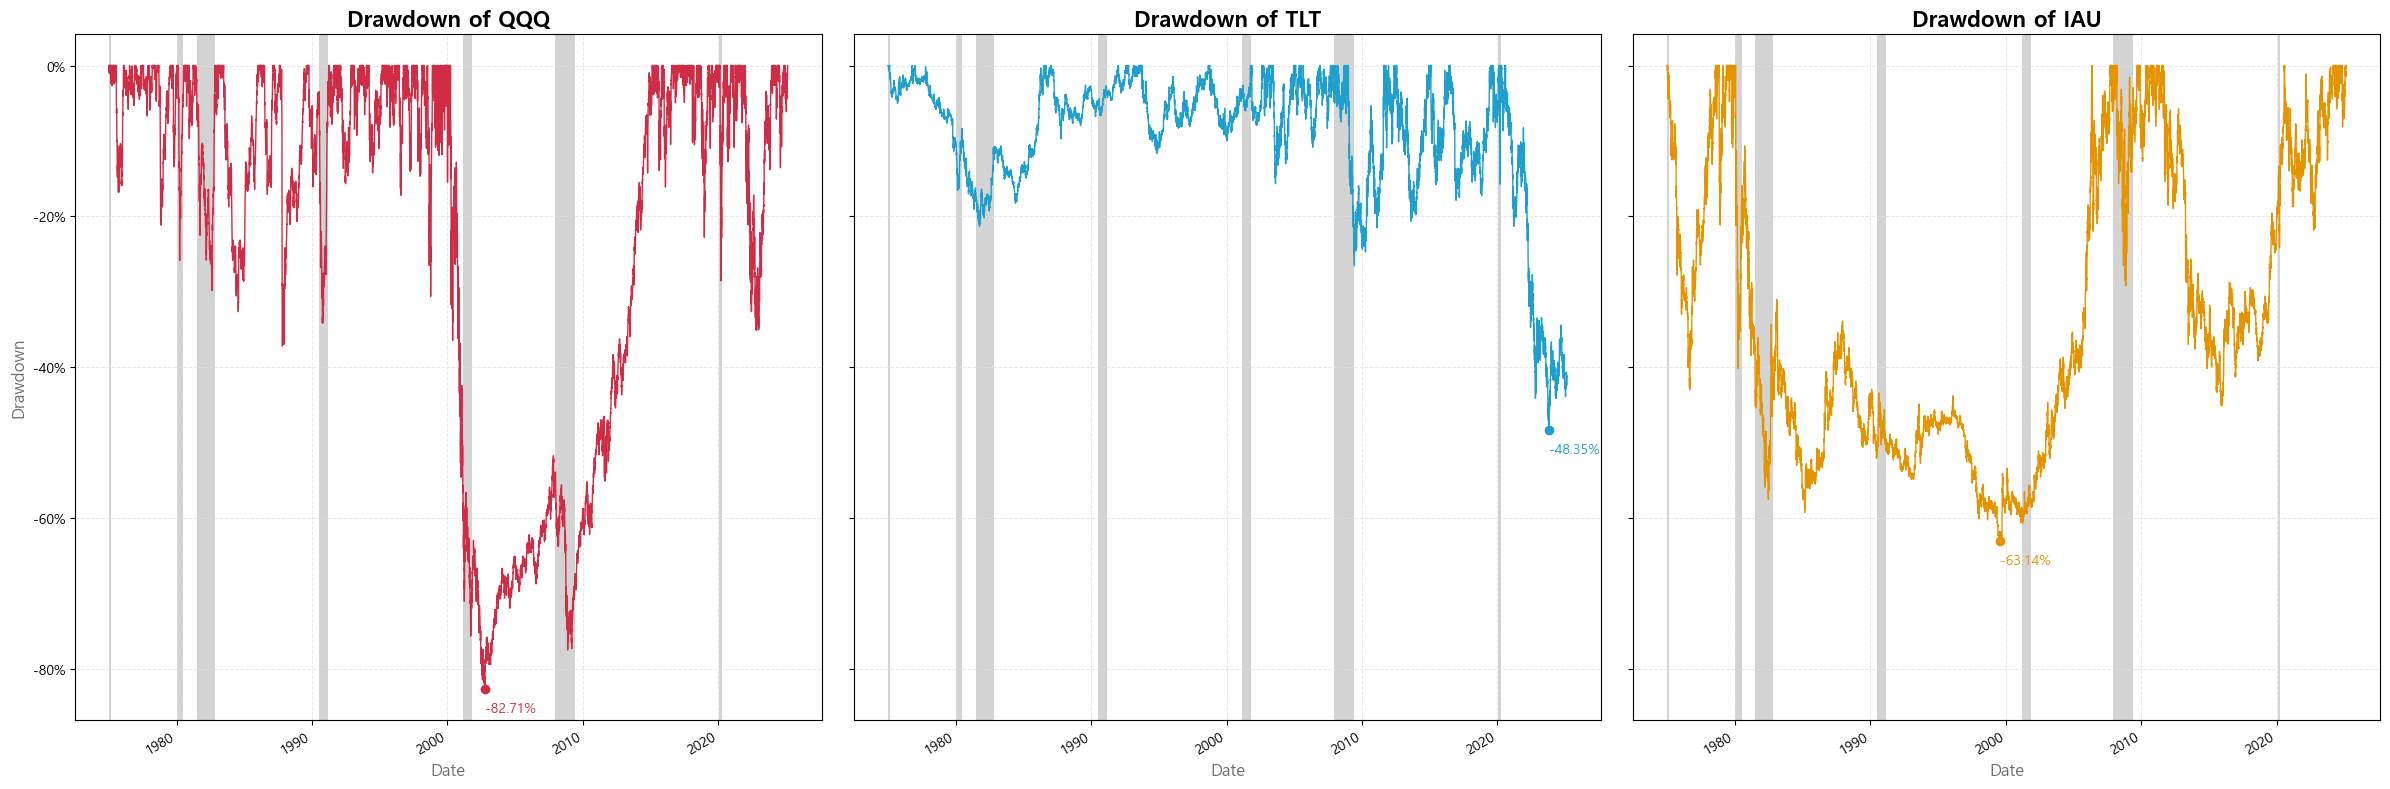

In [9]:
gm.drawdown_plot(dataset, assets, colors=[mycolors['color_norm'], mycolors['color_cont'], mycolors['color_sub']])

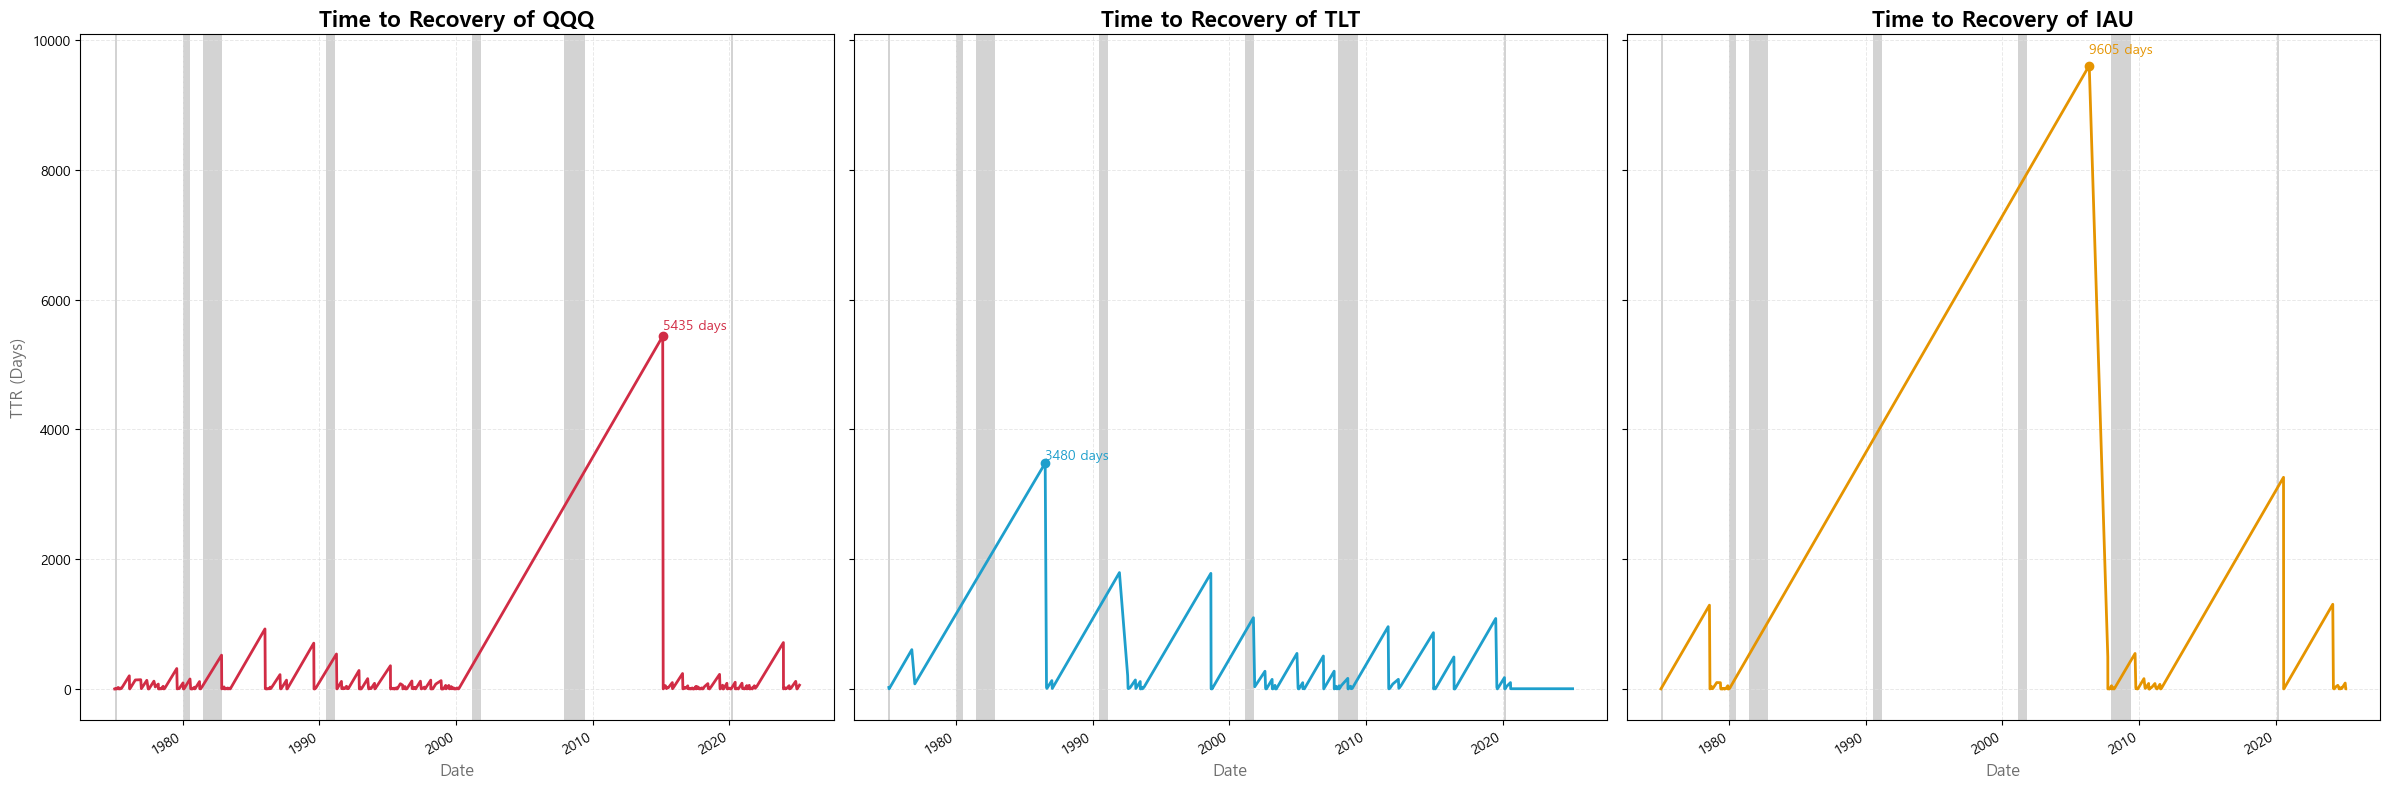

In [10]:
ttr_df = mf.get_ttr_df(dataset, assets)

gm.ttr_plot(ttr_df, assets, colors=[mycolors['color_norm'], mycolors['color_cont'], mycolors['color_sub']])

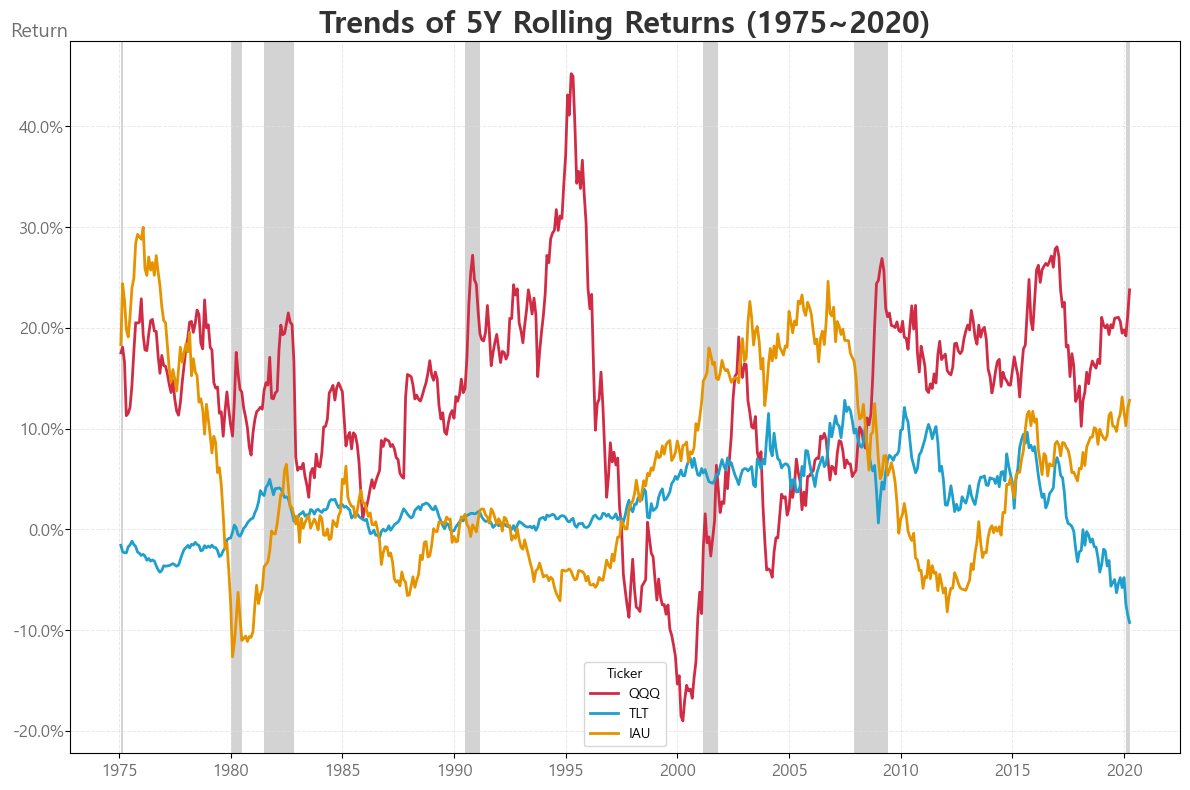

In [11]:
rr_df = mf.get_rr_df(dataset, assets)
gm.rr_trend_plot(rr_df, assets, colors=[mycolors['color_norm'], mycolors['color_cont'], mycolors['color_sub']])

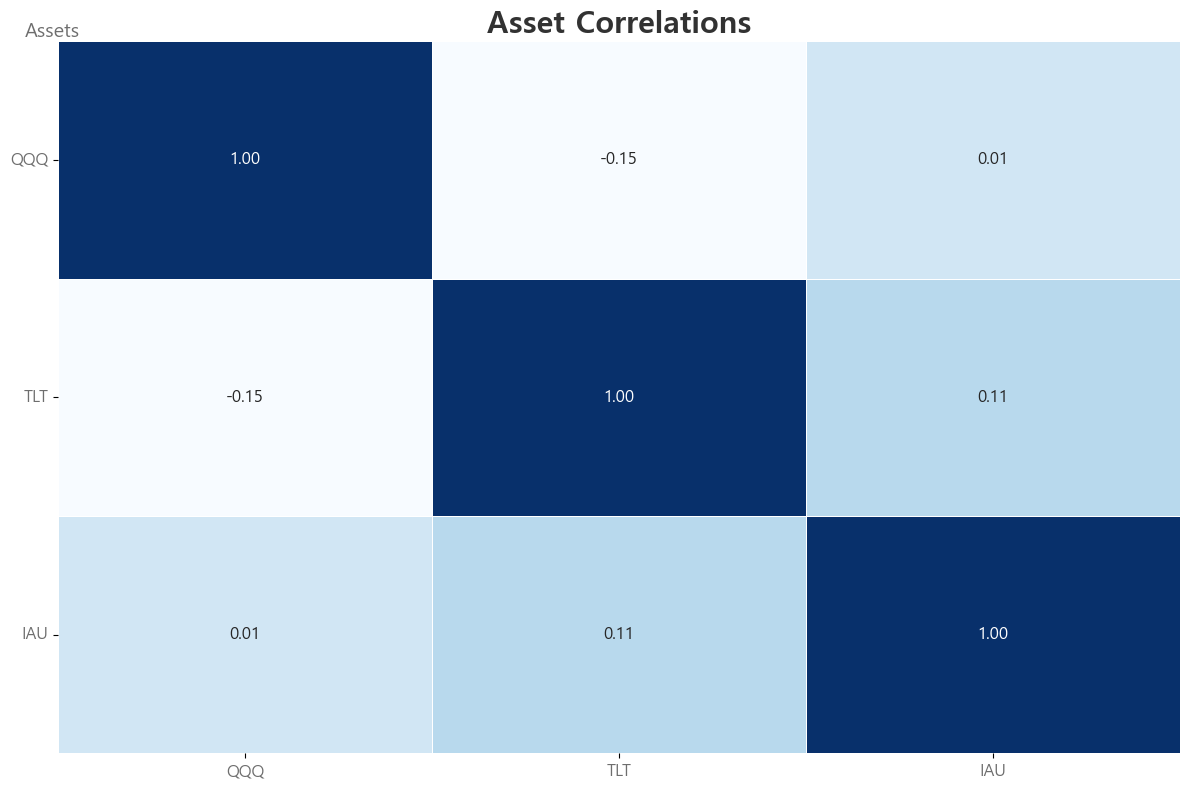

In [12]:
corr_df = dataset.pct_change()[assets].corr()
gm.corr_plot(corr_df)

## Portfolio Optimization

In [13]:
port_df = dataset[assets].resample('M').last()

In [14]:
allocator = portfolio_obtimizer.PortfolioAllocator()

cal_optimal => eg. process, obtimal, min_risk = cal_optimal(df)
eg. process, obtimal, min_risk = cal_optimal(df)


In [15]:
process, obtimal, min_risk = allocator.cal_optimal(port_df, unit='monthly', rebalancing='m', d=5, min_edge=0)

총 231번 시행 예정
1번째 시행 중
100번째 시행 중
200번째 시행 중


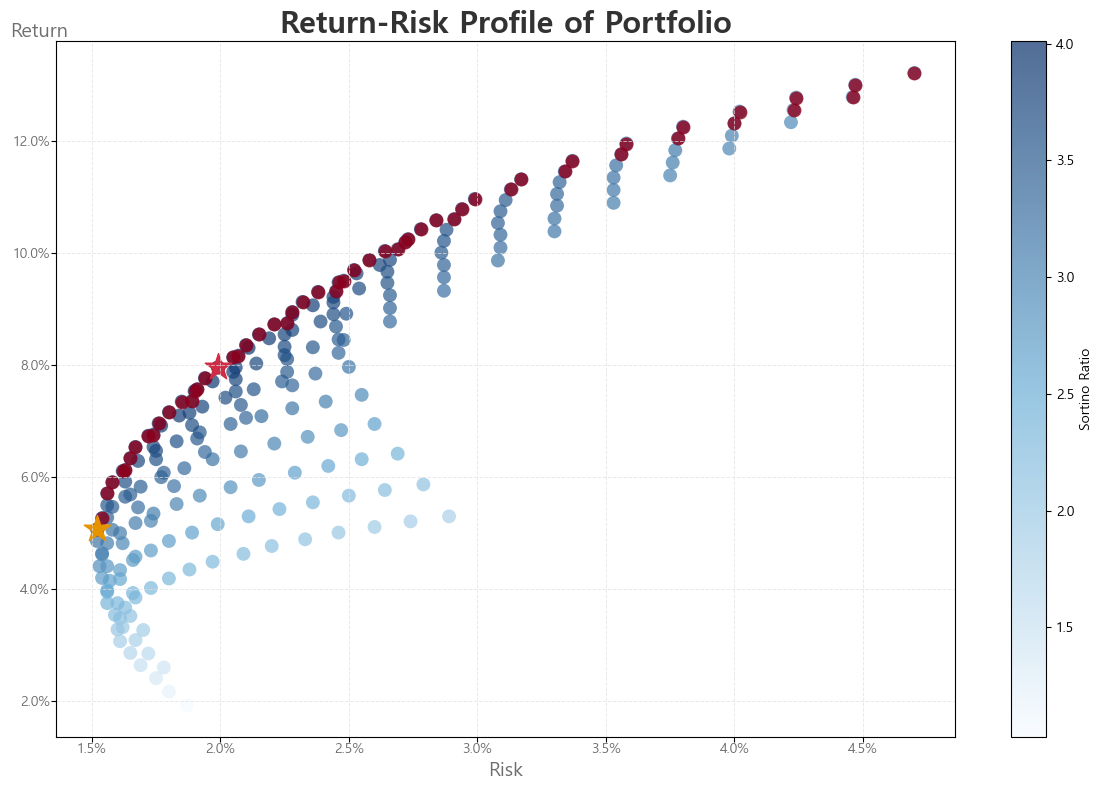

In [16]:
gm.portfilio_return_risk_profile_plot(process, obtimal, min_risk)

In [17]:
obtimal

,QQQ,TLT,IAU,Return,Volatility,Volatility(Down),Sharpe Ratio,Sortino Ratio,Point
0,0.35,0.3,0.35,7.96,3.0,1.99,2.66,4.01,Obtimal


In [18]:
ratio = [0.35, 0.3, 0.35]
result = allocator.cal_rebalancing(dataset[port_df.columns], ratio=ratio, rebalancing='m', unit='daily')
result.rename(columns={'strategy':'Portfolio'}, inplace=True)
result = result/result.iloc[0]*100

In [19]:
port_assets = ['Portfolio'] + assets
port_bm = ['Portfolio'] + ['QQQ']

In [20]:
anal_funcs.get_Vol_report(result, method='a', rf=0)

,Return,Volatility,Volatility(Down),Residual,Beta,Sharpe_Ratio,Sortino_Ratio,Trainer_Ratio,Jensen_Alpha,Info_Ratio
Ticker,,,,,,,,,,
QQQ,13.43,6.27,4.70,0.00,1.00,2.14,2.86,13.43,-0.00,NaN
TLT,1.92,2.80,1.87,6.92,-0.05,0.69,1.03,-40.49,2.55,-1.66
IAU,5.29,4.88,2.89,7.82,0.04,1.09,1.83,133.81,4.76,-1.04
Portfolio,7.24,2.93,1.98,4.59,1.56,2.47,3.66,4.63,-13.74,-1.35


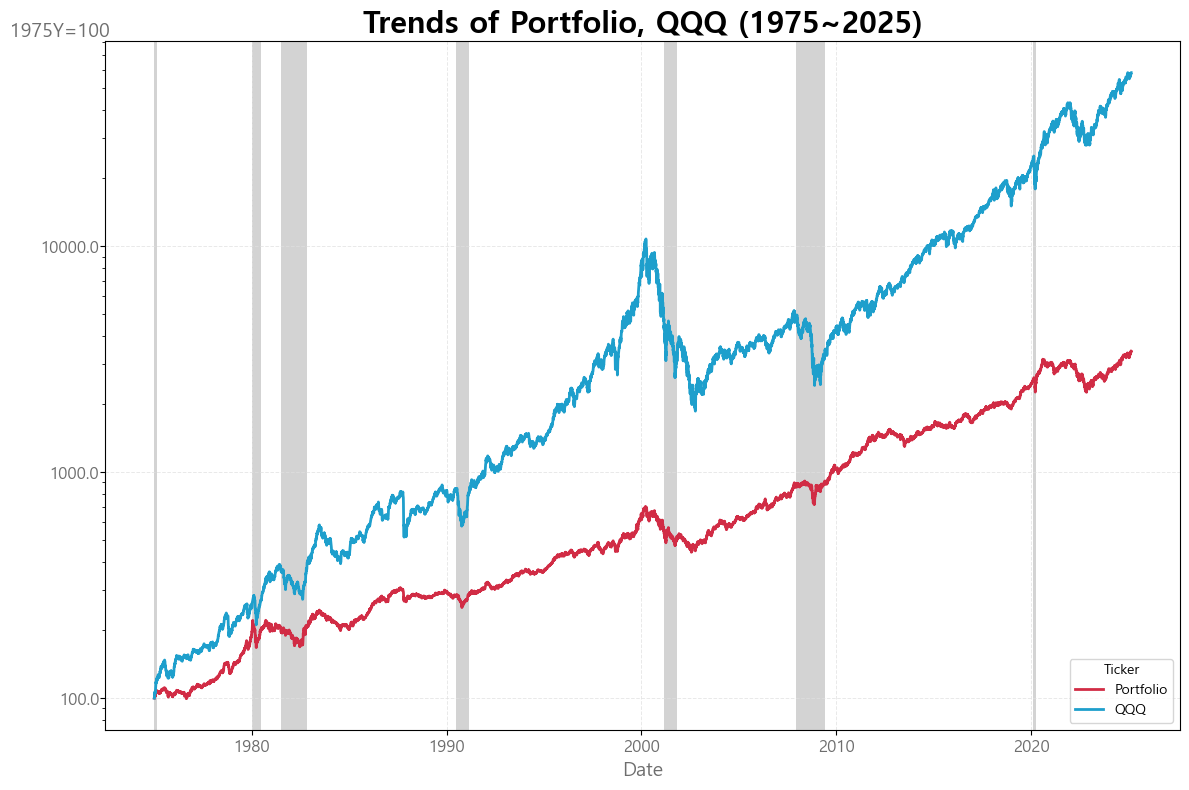

In [21]:
gm.trend_plot(result, port_bm, colors=[mycolors['color_norm'], mycolors['color_cont']])

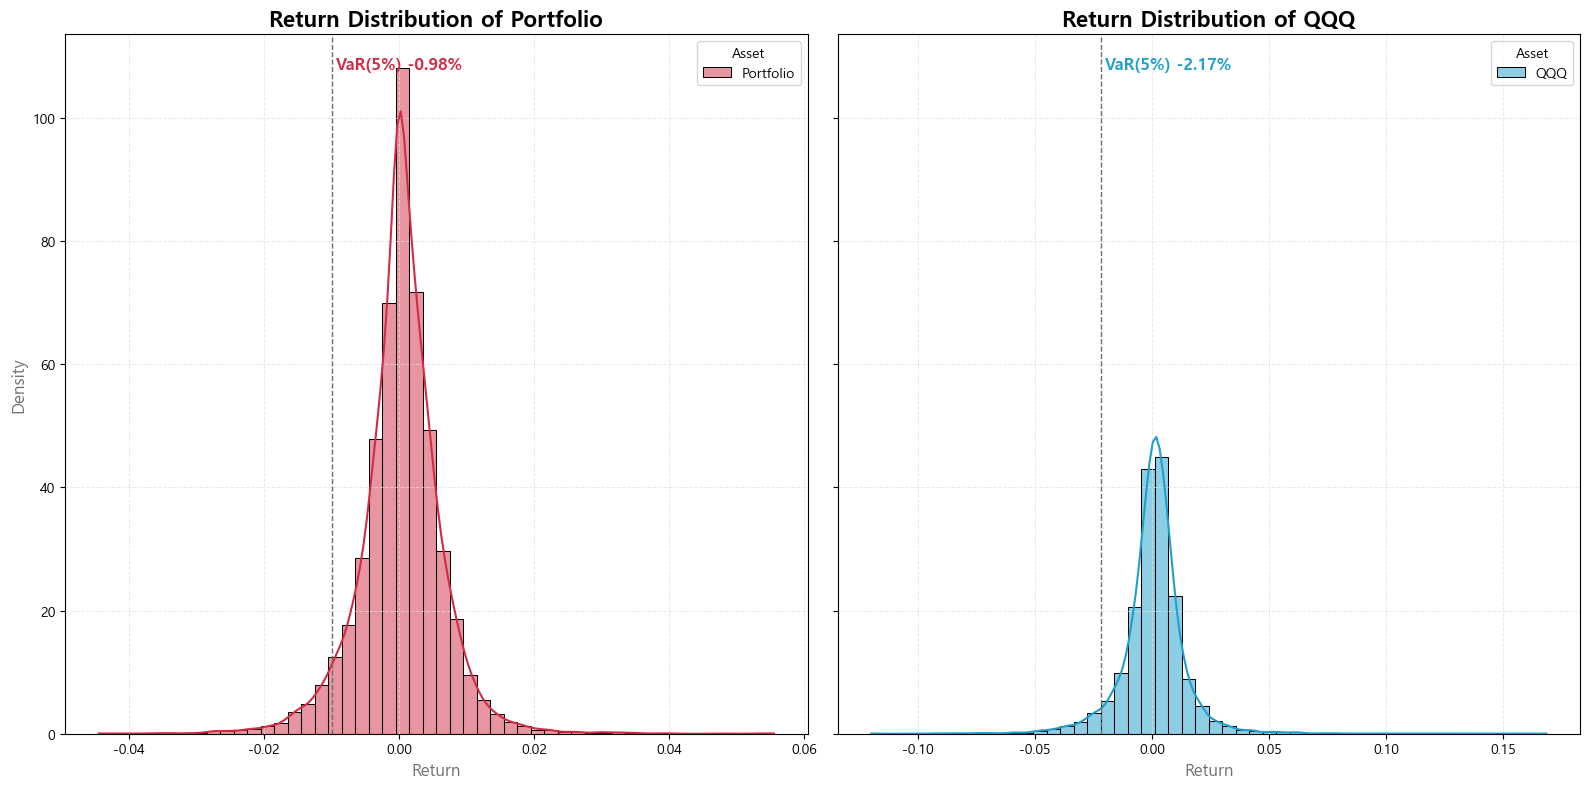

In [22]:
gm.asset_histogram_plot(result.pct_change(), port_bm, colors=[mycolors['color_norm'], mycolors['color_cont'], mycolors['color_sub']])

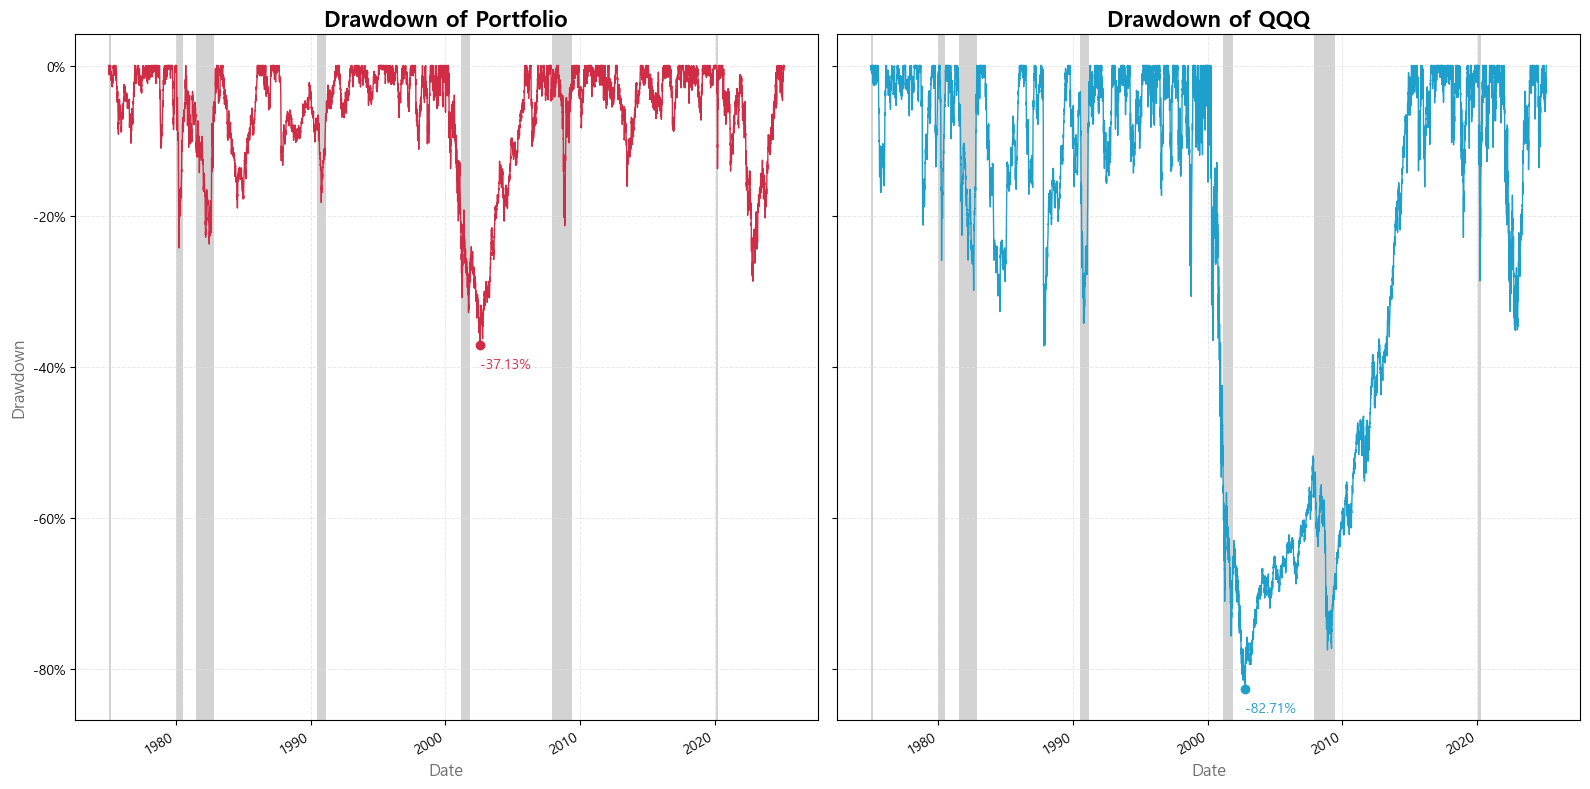

In [23]:
gm.drawdown_plot(result, port_bm,  colors=[mycolors['color_norm'], mycolors['color_cont']])

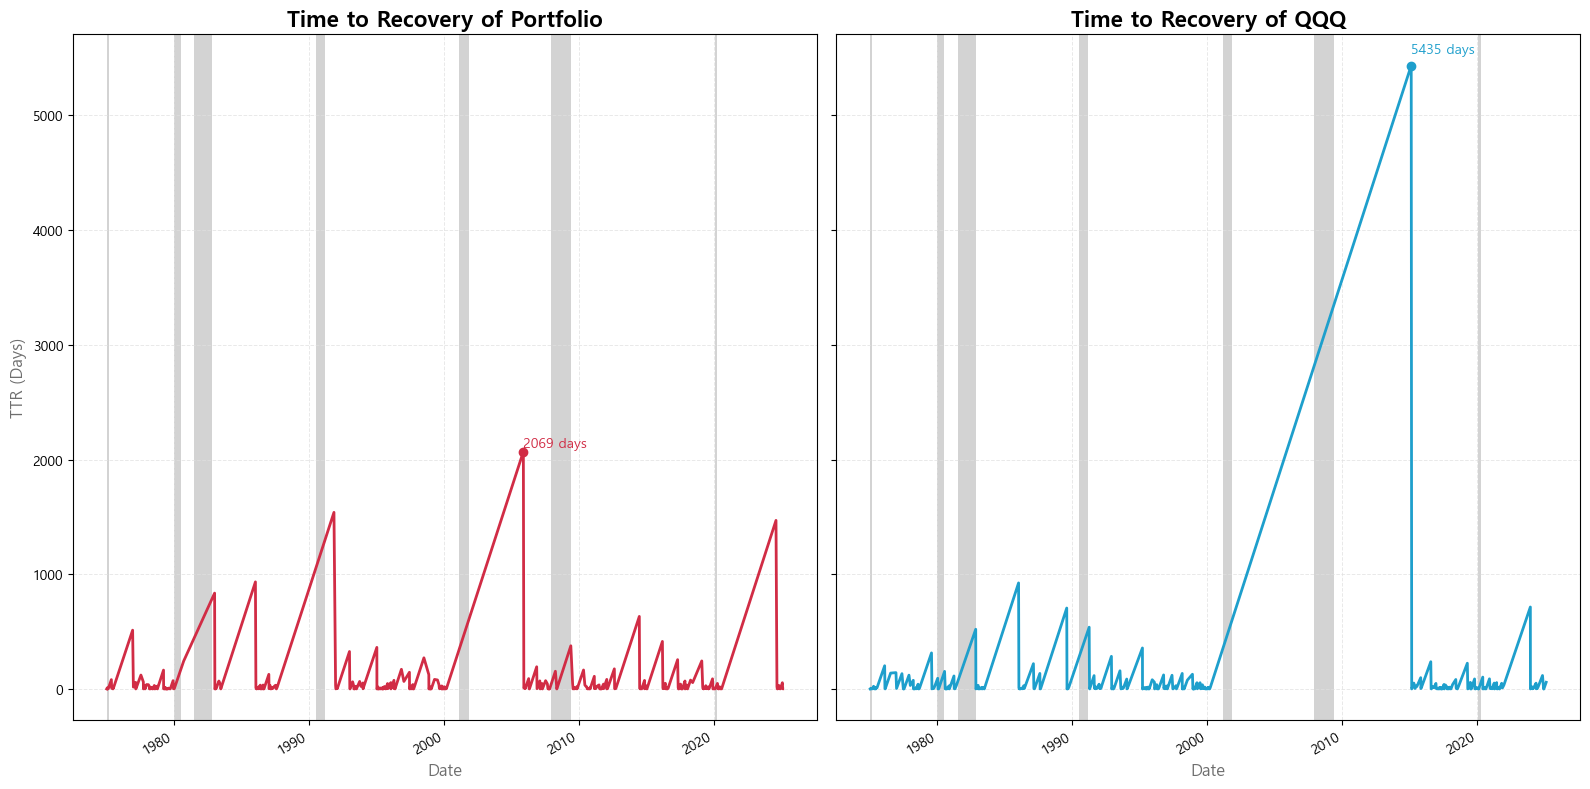

In [24]:
ttr_df = mf.get_ttr_df(result, port_bm)
gm.ttr_plot(ttr_df, port_bm, colors=[mycolors['color_norm'], mycolors['color_cont']])

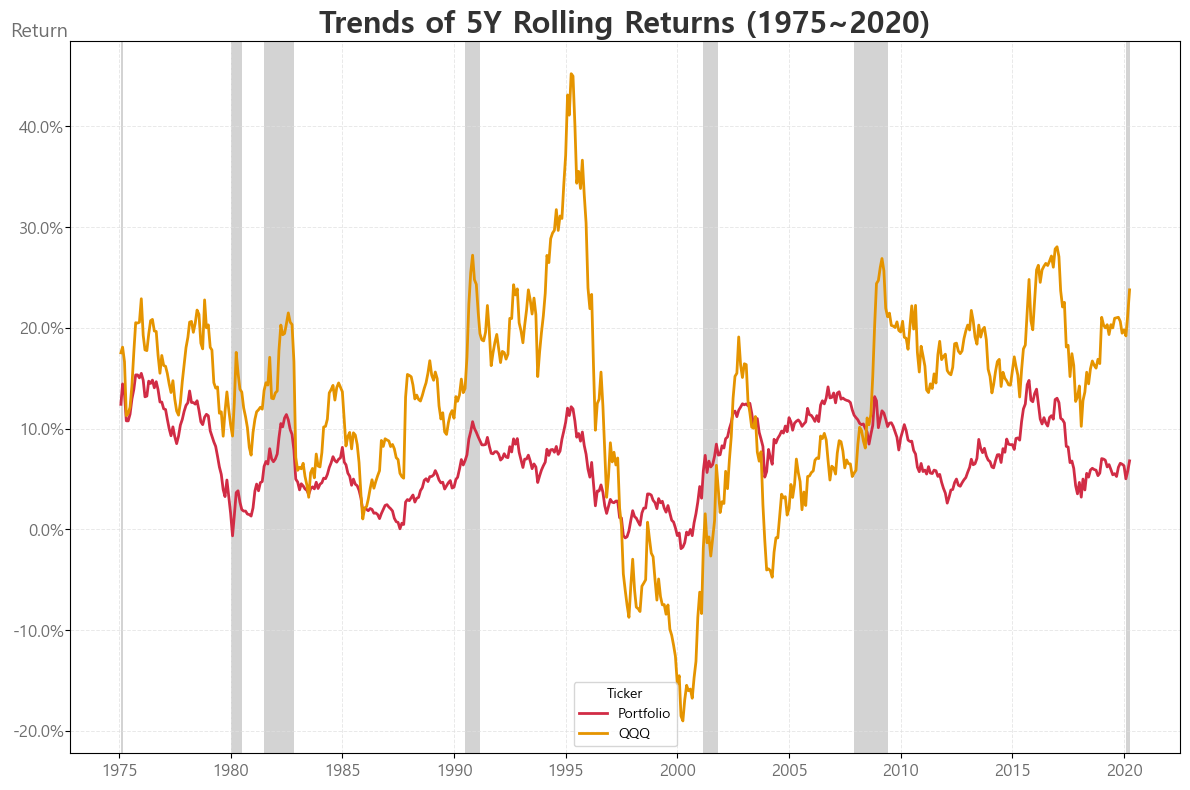

In [25]:
rr_df = mf.get_rr_df(result, port_bm)
gm.rr_trend_plot(rr_df, port_bm, colors=[mycolors['color_norm'], mycolors['color_sub']])